In [2]:
!pip install rouge/requirements.txt
!pip install rouge-score

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [3]:
import pandas as pd
import numpy as np
import math
from rouge_score import rouge_scorer
from matplotlib import pyplot as plt

In [4]:
WikiHow_sample_leq512 = pd.read_csv('WikiHow_sample_leq512_withsummary.csv')

In [5]:
i = 0
df_cropped = WikiHow_sample_leq512.loc[0:36200,:]
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
for headline, summary in zip(df_cropped['headline'],df_cropped['summary']):
    scores = scorer.score(summary,headline)
    WikiHow_sample_leq512.loc[i,'Rouge1'] = scores['rouge1'].fmeasure
    WikiHow_sample_leq512.loc[i,'Rouge2'] = scores['rouge2'].fmeasure
    WikiHow_sample_leq512.loc[i,'RougeL'] = scores['rougeL'].fmeasure
    WikiHow_sample_leq512.loc[i,'RougeLsum'] = scores['rougeLsum'].fmeasure
    i += 1

KeyboardInterrupt: 

In [6]:
df_cropped_scored = WikiHow_sample_leq512.loc[0:36200,:]
df_cropped_scored['text_length'].corr(df_cropped_scored['Rouge1'])
corr_table = {'Rouge1': [df_cropped_scored['text_length'].corr(df_cropped_scored['Rouge1'])], 
        'Rouge2': [df_cropped_scored['text_length'].corr(df_cropped_scored['Rouge2'])], 
        'RougeL': [df_cropped_scored['text_length'].corr(df_cropped_scored['RougeL'])],
        'RougeLsum': [df_cropped_scored['text_length'].corr(df_cropped_scored['RougeLsum'])]} 
correlation = pd.DataFrame(corr_table, index=['text_length'])

In [7]:
corrrlation

Rouge1   Rouge2    RougeL  RougeLsum
text_length  0.208014  0.07995  0.134772   0.182112

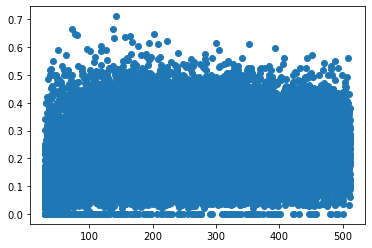

In [13]:
plt.plot(WikiHow_sample_leq512['text_length'],WikiHow_sample_leq512['Rouge1'],'o')